In [3]:
##### This code is from Updated Testing Reddit - No Con- bias (Fictitious Play)-01092022
##### This code replace the big real datanetwork with small sythetic network 
import scipy
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from itertools import combinations
import time
import random
from scipy.stats import beta
import pandas as pd
import copy
%matplotlib inline
#%run pure_strategy_selection.ipynb  #include simple selection algorithm
import scipy.io
import collections
import sys


## Use this version to check if previous discrete Minmax result right or not - Karate is right.

## Mathmatic Functions

In [4]:
# centers the opinion vector around 0\n",
def mean_center(op, n):
    ones = np.ones((n, 1))
    x = op - (np.dot(np.transpose(op),ones)/n) * ones
    return x
    
# compute number of edges, m\n
def num_edges(L, n):
    m = 0
    for i in range(n):
        for j in range(n):
            if i > j and L[i,j] < 0:
                m += 1            
    return m

# maximizing polarization only: \\bar{z}^T \\bar{z}   
def obj_polarization(A, L, op, n):
    op_mean = mean_center(op, n)
    z_mean = np.dot(A, op_mean) 
    return np.dot(np.transpose(z_mean), z_mean)[0,0] 

def obj_polarization_1(A, L, op, n):
    z = np.dot(A, op) 
    z_mean = mean_center(z, n)
    return np.dot(np.transpose(z_mean), z_mean)[0,0] 

# Calculate innate polarization
def obj_innate_polarization(s, n):  
#     np.set_printoptions(precision=5)
    op_mean = mean_center(s, n)
    return np.dot(np.transpose(op_mean), op_mean)[0,0]

In [5]:
# Parameters for the network

np.set_printoptions(precision=3)

## Creating Network
### 1. Make Random Network

In [179]:
# name = "Karate"
# filename = "%s.ipynb" % name
# print(filename)
# %run filename
#%run Karate.ipynb
#%run Twitter.ipynb
%run Reddit.ipynb

553


<Figure size 1440x1440 with 0 Axes>

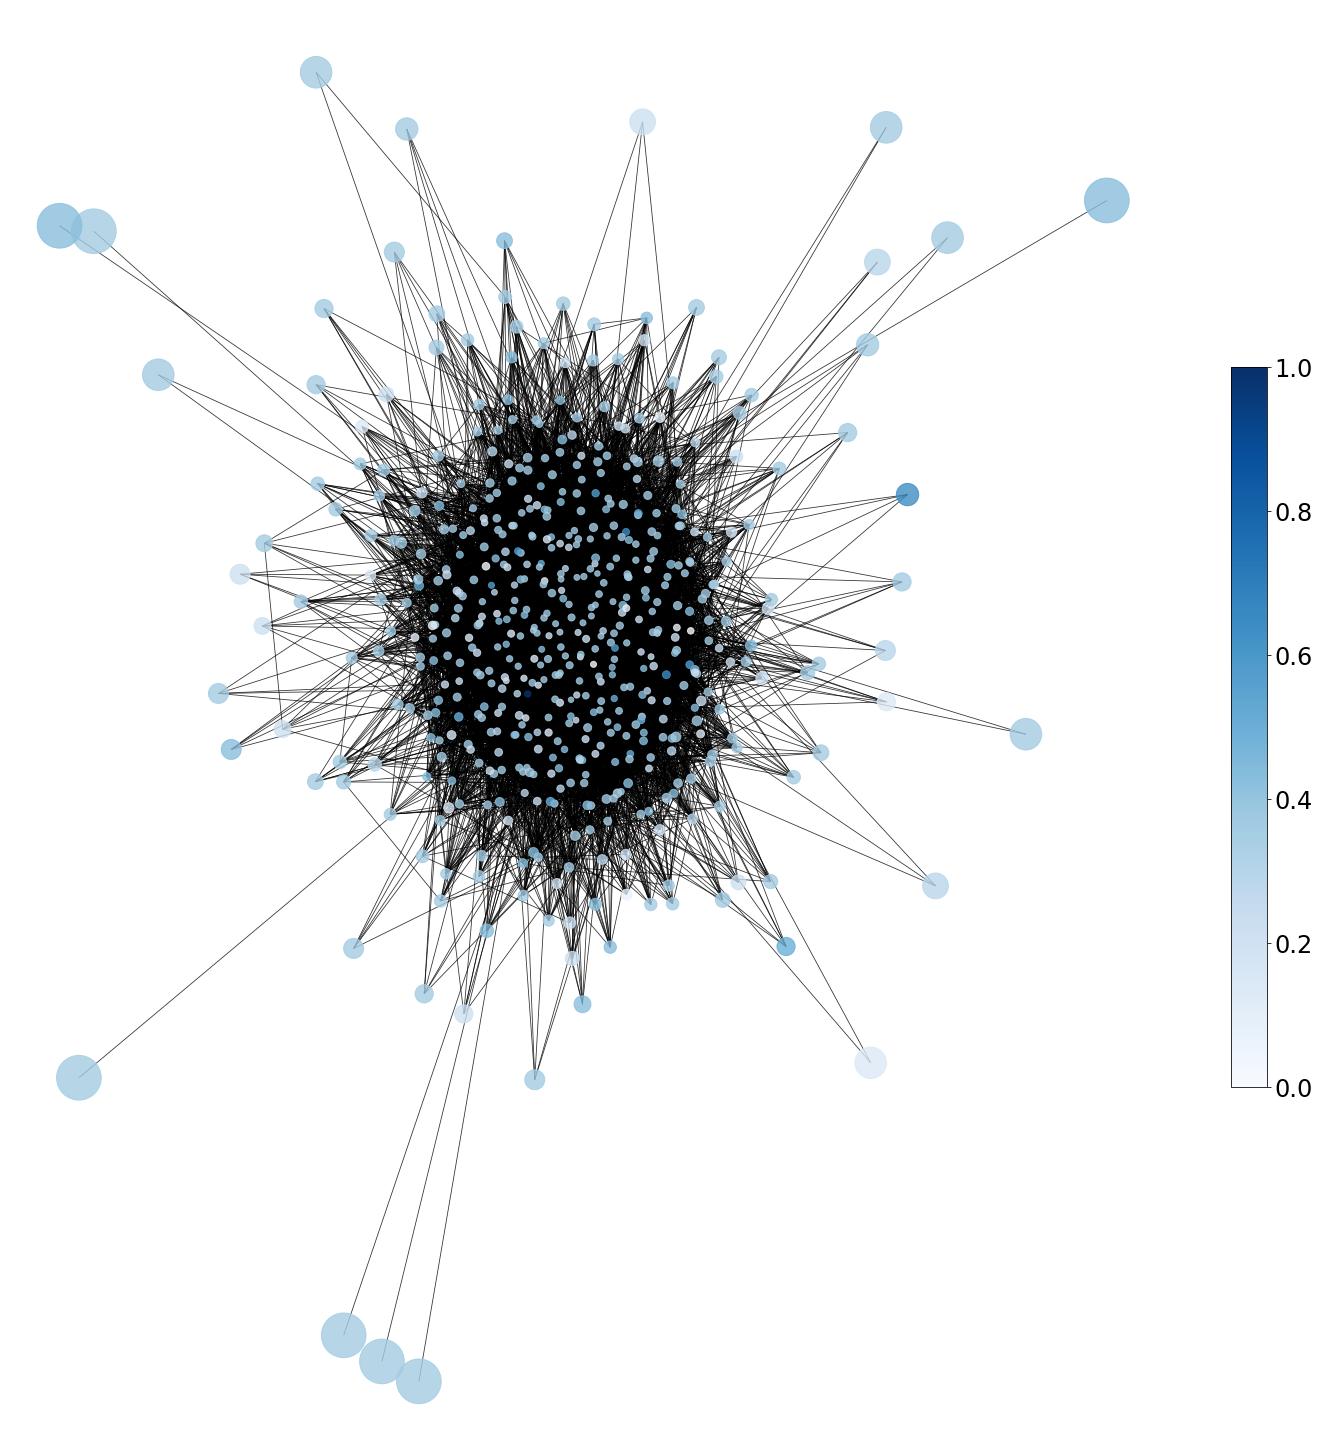

In [180]:
# what the twitter graph looks like 
s_use = s.flatten()   # Convert array to a list for later operation
s_use = s_use.tolist()
new_s = [i * 30 for i in s_use]
df = pd.DataFrame(new_s, columns=['Opinion']) #create a datafram with index at column 1, opinion at column 2

nxG = nx.from_numpy_matrix(G)   
# nxG = nx.relabel_nodes(nxG, mapping)      
plt.figure(figsize=(20, 20))


def node_edge(G, n):
    edges =[]
    for v in range(n):
        a = np.array(np.nonzero(G[v])[0])
        edge = len(a)
#         print(edge)
        edges.append(edge)
        
    return edges

node_edges = node_edge(G, n)
# print(node_edges)

node_sizes =[]
for i in node_edges:
    node_size = 1/i*2000
    node_sizes.append(node_size)

min_equi = [202,351,490]
max_equi = [199,529,37]
# Create node color
color_map = []
for node in nxG:
    if node in min_equi:
        color_map.append('orange')
    elif node in max_equi:
        color_map.append('red')
    else:
        color_map.append('grey')
# print(node_sizes)

######################### Calculate Key Values & Visualization #######################################3
L = scipy.sparse.csgraph.laplacian(G, normed=False)  # Return the Laplacian matrix
A = np.linalg.inv(np.identity(n) + L)  # A = (I + L)^(-1)\n  Stanford paper theory
m = num_edges(L, n)                    # call the function to calculate the number of edges
columnsum_ij = np.sum(A, axis=0)
#print(columnsum_ij)
print(n)
# what the twitter graph looks like 
nxG = nx.from_numpy_matrix(G)          
plt.figure(figsize=(20, 20))

# Fix seed - fix network shape
my_pos = nx.spring_layout(nxG, seed = 2)
nx.draw(nxG, pos= my_pos, with_labels= False, node_color=df['Opinion'].astype(int),cmap=plt.cm.Blues, node_size= node_sizes, edge_color='black', width=0.8, font_color='black',font_size=26, font_weight='bold', alpha=0.8)
#nx.draw(nxG, pos = my_pos, with_labels=False, node_color=color_map, node_size= node_sizes, edge_color='grey', width=0.5, font_color='white',font_size=9, font_weight='bold')
sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin = 0, vmax=1))
cbar = plt.colorbar(sm, shrink = 0.5)
tick_font_size = 24
cbar.ax.tick_params(labelsize=tick_font_size)
plt.show()

# if we want to customize the color bar range to min/max s
# vmin = min(s)
# vmax = max(s)
# sm = plt.cm.ScalarMappable(cmap=plt.cm.Blues, norm=plt.Normalize(vmin = vmin, vmax=vmax))
# sm._A = []
# plt.colorbar(sm,shrink=0.5)
# plt.show()

### Min [245, ] [284, ]       Max [50, ] [481, ] 

## Network Analysis

In [9]:
# Checking Selected node proprties, no need to run for simulation.

def node_edge(G, n):
    edges =[]
    for v in range(n):
        a = np.array(np.nonzero(G[v])[0])
        edge = len(a)
#         print(edge)
        edges.append(edge)
        
    return edges

edges = node_edge(G, n)
print('Edge Properties')
print('Max:'+ str(np.max(edges)))
print('Mean: ' + str(np.mean(edges)))
print('Min: ' + str(np.min(edges)))

min_equi = [245,284]
max_equi = [50,481]


print('Min Choice')
print('11'+ str(s[11]))
print(np.nonzero(G[11]))
# print('   edge:'+ str(edges[199]))

print('16'+ str(s[16]))
print(np.nonzero(G[16]))
# print('   edge:'+ str(edges[37]))


print('12'+ str(s[12]))
print(np.nonzero(G[12]))
# print('   edge:'+ str(edges[529]))

print('Max Choice')
print('15'+ str(s[15]))
print(np.nonzero(G[15]))
# print('   edge:'+ str(edges[202]))


Edge Properties
Max:17
Mean: 4.588235294117647
Min: 1
Min Choice
11[0.77]
(array([0], dtype=int64), array([0], dtype=int64))
16[0.512]
(array([0, 0], dtype=int64), array([5, 6], dtype=int64))
12[0.64]
(array([0, 0], dtype=int64), array([0, 3], dtype=int64))
Max Choice
15[0.423]
(array([0, 0], dtype=int64), array([32, 33], dtype=int64))


In [10]:
print("___________________Min Analyze__________________________________________")
print(np.argmax(s))
print(np.argmin(s))

s_aa = s[:, 0]
my_dict = {index: value for index, value in enumerate(s_aa)}
sorting_s = sorted(my_dict.items(), key=lambda x:x[1])
sorted_S = dict(sorting_s)
print(sorted_S)
search_key = 86

temp = list(sorted_S.items()) 
res = [idx for idx, key in enumerate(temp) if key[0]==search_key]
# printing result 
print("Opinion rank of this agent is : " + str(res))


___________________Min Analyze__________________________________________
11
29
{29: 0.2065732769497216, 20: 0.2378355132396121, 27: 0.2457746750273635, 3: 0.25481067581322, 22: 0.2563547092455989, 2: 0.2569361098653809, 23: 0.2708565670154095, 33: 0.2916447236743404, 9: 0.292990277226838, 0: 0.3329855890252891, 28: 0.3401210877868077, 18: 0.3518122646975705, 19: 0.3657317039639005, 30: 0.3843924362005658, 4: 0.4010312931106546, 13: 0.4016676996257509, 25: 0.4227628714480405, 15: 0.4228007697613097, 10: 0.4374543270176704, 26: 0.4449042104919422, 32: 0.4877651933335371, 31: 0.4967505699320694, 16: 0.5120312044870241, 21: 0.5592090235429361, 12: 0.640120610637489, 5: 0.6946240837167924, 8: 0.7067782468063173, 6: 0.720404905537744, 1: 0.7292162342929378, 24: 0.7375304885380007, 7: 0.7377757624061752, 17: 0.7550029202077742, 14: 0.763982714954492, 11: 0.7704062562620455}
Opinion rank of this agent is : []


In [13]:
print("___________________Max Analyze__________________________________________")
nxG = nx.from_numpy_matrix(G) 
# G = nx.karate_club_graph()
print("_______________Degree Centrality_____________________________")  
plt.figure(figsize =(15, 15))
deg_centrality = nx.degree_centrality(nxG)
sortedDict = sorted(deg_centrality.items(), key=lambda x:x[1])
converted_dict = dict(sortedDict)
print(converted_dict)
print("                           ")
print("_______________Closeness Rank_____________________________")
close_centrality = nx.closeness_centrality(nxG)
sortedDict1 = sorted(close_centrality.items(), key=lambda x:x[1])
converted_dict1 = dict(sortedDict1)
print(converted_dict1)
print("                           ")
print("_______________Page Rank_____________________________")
pr = nx.eigenvector_centrality(nxG)
sortedDict3 = sorted(pr.items(), key=lambda x:x[1])
converted_dict3 = dict(sortedDict3)
print(converted_dict3)

print("                           ")

def gap(op, n):
    ones = np.ones((n, 1))
    x = op - (np.dot(np.transpose(op),ones)/n) * ones
    return abs(x)

gap = gap(s,n)
my_gap = {index: value for index, value in enumerate(gap)}
sorting_gap = sorted(my_gap.items(), key=lambda x:x[1])
sorted_gap = dict(sorting_gap)
print(sorted_gap)



___________________Max Analyze__________________________________________
_______________Degree Centrality_____________________________
{11: 0.030303030303030304, 9: 0.06060606060606061, 12: 0.06060606060606061, 14: 0.06060606060606061, 15: 0.06060606060606061, 16: 0.06060606060606061, 17: 0.06060606060606061, 18: 0.06060606060606061, 20: 0.06060606060606061, 21: 0.06060606060606061, 22: 0.06060606060606061, 26: 0.06060606060606061, 4: 0.09090909090909091, 10: 0.09090909090909091, 19: 0.09090909090909091, 24: 0.09090909090909091, 25: 0.09090909090909091, 28: 0.09090909090909091, 5: 0.12121212121212122, 6: 0.12121212121212122, 7: 0.12121212121212122, 27: 0.12121212121212122, 29: 0.12121212121212122, 30: 0.12121212121212122, 8: 0.15151515151515152, 13: 0.15151515151515152, 23: 0.15151515151515152, 3: 0.18181818181818182, 31: 0.18181818181818182, 1: 0.2727272727272727, 2: 0.30303030303030304, 32: 0.36363636363636365, 0: 0.48484848484848486, 33: 0.5151515151515151}
                         

<Figure size 1080x1080 with 0 Axes>

### 4. Equilibrium & Polarization  - based on derivation
$$P(z) = z ^T * z $$


In [181]:

## s =  make_innat_opinions(n, c1)
# print('Innate Opinion')
# print(s)
# print('Equilibrium Opinion')
# print(np.dot(A, s))

op = s
y = mean_center(s,n)
# print(y)
innat_pol = np.dot(np.transpose(y), y)[0,0] 
print('Innate_polarization:')
print(innat_pol)

# Test equilibrium polarization
equ_pol = obj_polarization(A, L, s, n)
print('Equi_polarization:')
print(equ_pol)

di = equ_pol-innat_pol
print("Difference:")
print(di)

Innate_polarization:
0.9625703647920434
Equi_polarization:
0.005278437803904967
Difference:
-0.9572919269881384


In [15]:
payoff_matrix = [np.empty((0, 2*n), float)]
print(payoff_matrix)
print(np.zeros(2*n).shape)

[array([], shape=(0, 68), dtype=float64)]
(68,)


### Testing players' behavior

In [18]:

def MinMax_play(s,n):    # maxmizer first-time play, greedy algorithm
    print('Minimizer Play')
   
    (v1, min_opinion, min_pol, max_action) = choose_min_vertex(s, n) # The best choice among all opinions and vertexs, function is in "pure_strategy_selection.ipynb"
    (v2, max_opinion) = max_action
    if v1 == None:   # if maximizer cannot find one
        print('Maximizer fail')

    else:
        print("                                ")
        print("Maximizer finds its target agent:")
#         print('v1', 'changed_opinion', 'innate_obj', 'obj')
#         print(max_champion)

        #Store innate_op of the max_selected vertex
        old_opinion_min = s[v1, 0]
        old_opinion_max = s[v2, 0]
        ##### change the agent's opinion with best action(agent v1, max_op)

        ## check if agent's opinionis is changed or not
        print("Max Action:    "+"Agent" + str(v2) +" 's opinion " + str(old_opinion_max) + " changed to "+ str(max_opinion))
        print("Min Action:    "+"Agent" + str(v1) +" 's opinion " + str(old_opinion_min) + " changed to "+ str(min_opinion))
        print("Network reaches equilibrium Polarization: " + str(min_pol))


    return(v1, min_opinion, min_pol)

In [40]:
# determine which agent maximizer should select to maximizer the equilibrium polarization
def choose_min_vertex(s, n):
   # max_por = obj_polarization(A, L, op, n)  # use "innate"(after min action) polarization as a comparable standard to find max_por
    min_por = 10000
    C1 = list(range(n))    # for all agent 
    for v1 in C1:  
            print("________________________________________")
            print('Minimizer start from agent'+str(v1))
            (min_opinion, por, max_action) = get_min_opinion(s, n, v1)
 
            if por < min_por: # if the polarization of most recent action > maximum polarization of previous actions
                min_por = por
                champion = (v1, min_opinion,min_por, max_action)   # save the this action as champion    
    print("Min champion", champion)
    return (champion)


In [176]:

# def get_min_opinion(s, n, v1):
    
#     por_arr = [] #np.zeros(11)  # create a two_element array to store polarization value of each option
#     #Min has 10 options to change agent v2's opinion
#     min_opi_option = np.arange(0,1.05,0.05)
#     min_pol = 1000
#     # objective if set opinion to 0, 1.0
#     t = 0
#     while t<5:
#         t +=1
# #     def search_minop_cont(s, n, v1, min_opi_option):
#         por_arr = [] #np.zeros(11)  # create a two_element array to store polarization value of each option
#         min_pol = 1000
#         max_champion = (None, None)
#         for min_opinion in min_opi_option:
# #             print(v1,min_opinion)
#             (v2,max_opinion, pol) = minmax_polar(s,v1,min_opinion)
#             por_arr.append(pol)
#             #print("max_pol: ", max_pol)
#             if  pol < min_pol:
#                 min_pol = pol
#                 max_champion = (v2,max_opinion)
# #         print("Max_champion:",max_champion)   
# #         print("Min choice:", por_arr)
#         minmize_op = min_opi_option[np.argmin(por_arr)]  # the index of maximum polarization = max_opinion --[0,1]
#         min_por = np.min(por_arr)        # find the maximum polarization in the record
        
       
#         if np.argmin(por_arr) ==0 or np.argmin(por_arr)==len(por_arr)-1:
#             print("Max_champion:",max_champion)
#             print("Min_opinion:", minmize_op)
#             return (minmize_op, min_por, max_champion)
#         else:
#             low_op = min_opi_option[np.argmin(por_arr)-1] 
#             up_op = min_opi_option[np.argmin(por_arr)+1] 
#             step = (up_op-low_op)/10
#             min_opi_option = np.arange(low_op,up_op+step,step)
#             continue 
#     print("________________________________________")
#     print("Max_champion:",max_champion)
#     print("Min_champion:", (v1, minmize_op))
    
def find_search_center(por_arr, ith):
    mylist = sorted(por_arr)
    Snd_por = mylist[ith-1]

    search_center = por_arr.index(Snd_por)
    return (search_center)
# determines if value of opinion at v should be set to 0 or 1 to maximize equilibrium polarization 
def get_min_opinion(s, n, v1):
    
    por_arr = [] #np.zeros(11)  # create a two_element array to store polarization value of each option
    #min_opi_option = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] #Min has 10 options to change agent v2's opinion
    min_opi_option = np.arange(0,1.05,0.05)
    min_pol = 1000 # set a big standarlization

    t = 0
    min_por = 1000
    max_champion = (None, None)
    while t<4:

        t +=1
#         print(str(t)+"_________________________________")
#         print("min_opi_option:",min_opi_option)
        por_arr = [] #np.zeros(11)  # create a two_element array to store polarization value of each option

        for min_opinion in min_opi_option:
#             print(v1,min_opinion)
            (v2,max_opinion, pol) = minmax_polar(s,v1,min_opinion)
            por_arr.append(pol)
            #print("max_pol: ", max_pol)
            if  pol < min_por:
                min_por = pol
                max_champion = (v2,max_opinion)
                min_op = min_opinion
                print(max_champion)
            minimize_por = min(por_arr)
            minmize_op = min_opi_option[np.argmin(por_arr)]  # the index of maximum polarization = max_opinion --[0,1]

#         print("Max_champion:",max_champion)   
#         print("Min choice:", por_arr)
        
        if t == 1:
            Original_min_por = minimize_por
            ith = 2 # after finding the min discret min_op, search near to the 2nd min_op
        elif t>1:
            ith = 1  #search minimum near to the ith min por
            if Original_min_por<= minimize_por:   
    #             print("Original_min_por,min_por,:", )
#                 print("1st discrete min is Optimal:", Original_min_por, min_por)#, Origin, min_por:", Original_min_por, min_por)
                 pass
            else: 
                 continue
#                 print("1st discrete min NOT optimal, Original_min_por,min_por:",Original_min_por, min_por)
                 
        search_center = find_search_center(por_arr, ith)
        low_op = min_opi_option[min(abs(search_center-1),search_center)] #Avoid if 2nd minimum at the edge
        up_op = min_opi_option[min(search_center+1, len(por_arr)-1)] 
#         print("SERACH BOUND:",low_op,up_op)
        min_opi_option = np.linspace(low_op,up_op,10)        
         
        
    print("Max_champion:",max_champion)
    print("Min_champion:", (v1, min_op))
    
    return (min_op, min_por, max_champion)

In [182]:
v1 = 6
get_min_opinion(s, n, v1)

(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (6, 0.5037037037037037)


(0.5037037037037037, 0.069649579201454, (481, 1))

In [26]:
def minmax_polar(s, v1, min_opinion):
    op = copy.copy(s)
    op[v1] = min_opinion  
    (v2,max_opinion, max_pol) = maximizer_play(op,n,v1)
    
    return (v2,max_opinion, max_pol)
    
    

In [27]:
##### minimizer first-time play, greedy algorithm
def maximizer_play(op,n,min_touched): 
    
    op1 = copy.copy(op)
    max_champion = choose_max_vertex(op1, n, min_touched) 
    (v2, max_opinion, max_pol) = max_champion
    
    if v2 == None:
        print('Minimizer fail')

    return (v2,max_opinion, max_pol)

### Minimizer Strategy

In [28]:
# Minimizer search: Go through each agent 

def choose_max_vertex(op, n, min_touched):
    # current opinion array that changed by maximizer, "innate" opinion that min start with

    #champion = (None, None, 0, None)  # assume the best action is champion
    max_por = 0
    all = list(range(n))    # for all agent 
    C1 = [x for x in all if x != min_touched]  # for the vertice that Maximizer has not touched
    
    for v2 in C1:   
        #print('Max start with agent '+ str(v2) )
        (changed_opinion, por) = get_max_opinion(op,n,v2)   # find the best new_op option           

        if por > max_por:  # if the recent polarization is smaller than the minimum polarization in the history
            max_por = por                         # update the recent option as champion
            champion = (v2, changed_opinion, max_por)  
#     print("Max champion", champion)
    return (champion)  # find the best minimizer's action after going through every new_op option of every agent


In [29]:
# determines if value of opinion at v should be set to 0 or 1 to maximize equilibrium polarization 
def get_max_opinion(op, n, v2):
    
    por_arr = np.zeros(2)  # create a two_element array to store polarization value of each option
    max_opi_option = [0, 1.0]   # Maximizer has two options to change agent v1's opinion
    op1 = copy.copy(op)
    
    # objective if set opinion to 0, 1.0
    j = 0
    for max_opinion in max_opi_option:
        op1[v2] = max_opinion
#         print("max change opinion:",op1)
        max_pol = obj_polarization(A, L, op1, n)
        por_arr[j] = max_pol
        j = j + 1   # index increase 1, put the polarization in array

    maxmize_op = np.argmax(por_arr)  # the index of maximum polarization = max_opinion --[0,1]
    max_por = np.max(por_arr)        # find the maximum polarization in the record
    
    return (maxmize_op, max_por)

In [183]:
MinMax_play(s,n)

Minimizer Play
________________________________________
Minimizer start from agent0
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (0, 0.5222222222222223)
________________________________________
Minimizer start from agent1
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (1, 1.0)
________________________________________
Minimizer start from agent2
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (2, 1.0)
________________________________________
Minimizer start from agent3
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1

Max_champion: (481, 1)
Min_champion: (27, 1.0)
________________________________________
Minimizer start from agent28
(302, 0)
(302, 0)
(302, 0)
(302, 0)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(302, 1)
Max_champion: (302, 1)
Min_champion: (28, 0.5944444444444444)
________________________________________
Minimizer start from agent29
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (29, 0.5277777777777778)
________________________________________
Minimizer start from agent30
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (30, 0.538888888888889)
________________________________________
Minimizer start from agent31
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(4

(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (57, 0.7611111111111111)
________________________________________
Minimizer start from agent58
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (58, 0.788888888888889)
________________________________________
Minimizer start from agent59
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (59, 0.8277777777777778)
________________________________________
Minimizer start from agent60
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Ma

(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (85, 1.0)
________________________________________
Minimizer start from agent86
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (86, 0.8222222222222223)
________________________________________
Minimizer start from agent87
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (87, 0.6111111111111112)
________________________________________
Minimizer start from agent88
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Mi

(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (113, 0.7611111111111111)
________________________________________
Minimizer start from agent114
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (114, 0.6950617283950619)
________________________________________
Minimizer start from agent115
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (115, 0.6777777777777778)
________________________________________
Minimizer start from agent116
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481

(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (141, 0.9111111111111111)
________________________________________
Minimizer start from agent142
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (142, 0.9611111111111111)
________________________________________
Minimizer start from agent143
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (143, 1.0)
________________________________________
Minimizer start from agent144
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(

(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (169, 1.0)
________________________________________
Minimizer start from agent170
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (170, 0.7450617283950618)
________________________________________
Minimizer start from agent171
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (171, 1.0)
________________________________________
Minimizer start from agent172
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1

(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (197, 1.0)
________________________________________
Minimizer start from agent198
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (198, 0.7277777777777777)
________________________________________
Minimizer start from agent199
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (199, 1.0)
________________________________________
Minimizer start from agent200
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1

(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (225, 0.888888888888889)
________________________________________
Minimizer start from agent226
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (226, 0.888888888888889)
________________________________________
Minimizer start from agent227
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (227, 0.6222222222222223)
________________________________________
Minimizer start from agent228
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 

(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (252, 1.0)
________________________________________
Minimizer start from agent253
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (253, 0.8777777777777778)
________________________________________
Minimizer start from agent254
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (254, 1.0)
________________________________________
Minimizer start from agent255
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (255, 0.6222222

(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (281, 0.5722222222222223)
________________________________________
Minimizer start from agent282
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (282, 0.8722222222222223)
________________________________________
Minimizer start from agent283
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (283, 0.6611111111111111)
________________________________________
Minimizer start from agent284
(481, 0)
(481, 0)
(481, 0)
(481, 0)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
(50, 1)
Max_champion: (50, 1)
Min_champion: (284, 0.55)
__________________

(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (308, 1.0)
________________________________________
Minimizer start from agent309
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (309, 0.9722222222222222)
________________________________________
Minimizer start from agent310
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (310, 0.6277777777777778)
________________________________________
Minimizer start from agent311
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_c

(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (336, 1.0)
________________________________________
Minimizer start from agent337
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (337, 1.0)
________________________________________
Minimizer start from agent338
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (338, 0.8777777777777778)
________________________________________
Minimizer start from agent339
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (339, 0.6111111111111112)
_________________________

(481, 1)
Max_champion: (481, 1)
Min_champion: (364, 0.788888888888889)
________________________________________
Minimizer start from agent365
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (365, 1.0)
________________________________________
Minimizer start from agent366
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (366, 0.7001371742112483)
________________________________________
Minimizer start from agent367
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (367, 0.9222222222222223)
____________________

(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (391, 0.838888888888889)
________________________________________
Minimizer start from agent392
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (392, 0.6987654320987655)
________________________________________
Minimizer start from agent393
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (393, 0.5549382716049382)
________________________________________
Minimizer start from agent394
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_c

Max_champion: (481, 1)
Min_champion: (419, 1.0)
________________________________________
Minimizer start from agent420
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (420, 0.538888888888889)
________________________________________
Minimizer start from agent421
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (421, 0.5111111111111111)
________________________________________
Minimizer start from agent422
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (422, 0.8611111111111112)
________________________________________
Minimizer start from agent423
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(48

(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (447, 0.8)
________________________________________
Minimizer start from agent448
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (448, 0.8222222222222223)
________________________________________
Minimizer start from agent449
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (449, 0.938888888888889)
________________________________________
Minimizer start from agent450
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champio

(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (475, 0.5611111111111111)
________________________________________
Minimizer start from agent476
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (476, 0.538888888888889)
________________________________________
Minimizer start from agent477
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (477, 1.0)
________________________________________
Minimizer start from agent478
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champio

(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (503, 0.6777777777777778)
________________________________________
Minimizer start from agent504
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (504, 0.5111111111111111)
________________________________________
Minimizer start from agent505
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (505, 1.0)
________________________________________
Minimizer start from agent506
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (506, 0.9888888888

(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (531, 1.0)
________________________________________
Minimizer start from agent532
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (532, 0.5450617283950618)
________________________________________
Minimizer start from agent533
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
Max_champion: (481, 1)
Min_champion: (533, 0.6277777777777778)
________________________________________
Minimizer start from agent534
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
(481, 1)
M

(245, 0.5037037037037037, 0.06886132117218158)

In [ ]:
agent = 6
network_anl(s,n,G,agent)

# 5. Save Results

In [ ]:
# def make_payoff_row(op1,v2, A, L, n):
#     payoff_row = np.zeros(2*n)

#     for column in range(2*n):
# #         print(column)
#         v1 = int(column/2)  #i.e., column 11 is agent 5, opinion 1
#         max_opinion = column%2
# #         print(v1, max_opinion)
#         # update the maximizer's change to the opinion array that has changed by minimizer(op1)
#         op2 = copy.copy(op1)
#         op2[v1,0] = max_opinion
#         # calculate the polarization with both max and min's action
#         payoff_row[column] = obj_polarization(A, L, op2, n)
    
#     j_1 = 2*v2 + 0
#     j_2 = 2*v2 + 1
#     O_P = obj_innate_polarization(s, n)
#     payoff_row[j_1] = O_P
#     payoff_row[j_2] = O_P
    
#     return payoff_row

# def make_payoff_matrix(s,n):
#     payoff_matrix = np.empty((0, 2*n), float)
#     C1 = list(range(n))    # for all agent 
#     for v2 in C1:         
#             print('Minimizer start from agent'+str(v2))
#             min_opi_option = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] #Min has two options to change agent v2's opinion
#             for min_op in min_opi_option:
#                      op = copy.copy(s)
#                      op[v2] = min_op
#                      payoff_row = make_payoff_row(op,v2, A, L, n) 
# #                      print(payoff_row)
#                      payoff_matrix = np.vstack([payoff_matrix, payoff_row])
#     return payoff_matrix

In [ ]:
# payoff_matrix = make_payoff_matrix(s,n)
#pd.DataFrame(payoff_matrix).to_csv('Karate Discrete Payoff Matrix1.csv')
# pd.DataFrame(payoff_matrix).to_csv('Reddit Discrete Payoff Matrix1.csv')
#pd.DataFrame(payoff_matrix).to_csv('Twitter Discrete Payoff Matrix1.csv')

In [ ]:
### Save simulation result to TXT file

# with open('Result'+str(Network)+'.'+str(Experiment)+'.txt', "a") as f:
# #     print(Experiment_note, file=f)
#     print('Initial Condition -(agent, opinion, pol)', file=f)
#     print('Innate op'+str(s),file=f)
#     print('Adjacency matrix'+ str(G), file=f)
  